This notebook explores some parts of Chapter 1.
<http://neuralnetworksanddeeplearning.com/chap1.html>

The Python 3.5 version of the source is here: 
<https://github.com/MichalDanielDobrzanski/DeepLearningPython35>

# Network 

In [1]:
import numpy as np

In [2]:
class Network(object):

    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) 
                        for x, y in zip(sizes[:-1], sizes[1:])]

In [3]:
net = Network((8, 15, 10))

In [4]:
net.sizes

(8, 15, 10)

In [5]:
net.num_layers

3

In [6]:
net.biases

[array([[ 0.34331037],
        [ 0.19065586],
        [ 1.26154056],
        [ 0.54151727],
        [-0.75305769],
        [ 0.82941868],
        [-0.05034348],
        [ 0.4061331 ],
        [ 0.10808966],
        [ 0.7652352 ],
        [-1.53646743],
        [-0.08757797],
        [-1.09670401],
        [-1.66344711],
        [-0.76410635]]), array([[-1.40789346],
        [ 0.70036184],
        [ 0.42978796],
        [-1.14096879],
        [ 0.33462415],
        [ 0.65230848],
        [ 1.86457584],
        [-1.7668684 ],
        [-0.67104384],
        [-0.57353652]])]

In [7]:
net.weights

[array([[  3.02896955e-01,  -1.34236154e+00,  -1.34873080e+00,
          -1.66995052e+00,  -3.35382143e-01,   5.46647383e-04,
          -6.43563724e-01,   1.86109841e+00],
        [ -9.28764857e-01,  -9.50944004e-02,  -1.48709423e-01,
           3.54463629e-01,  -3.36760313e-01,  -1.35825222e+00,
          -1.09754646e+00,   3.18502522e-01],
        [  1.65517335e-01,   8.32425749e-01,  -1.02501163e+00,
          -1.63017884e+00,   1.23707779e+00,  -5.47027289e-01,
          -1.51127298e-02,   1.73846347e+00],
        [ -1.89273782e+00,  -8.09460024e-01,   1.16280287e+00,
           1.81297357e-01,  -5.68559738e-01,   1.68001939e+00,
           1.18209611e+00,  -1.21616574e+00],
        [ -8.98541111e-01,  -1.99319549e+00,  -3.00112404e-01,
          -1.47429712e+00,  -4.76168028e-01,   1.18289627e+00,
          -9.27310755e-01,  -4.73972562e-01],
        [  6.27242652e-01,   5.84619221e-01,  -1.36319543e+00,
          -5.87958084e-02,  -1.09728976e-01,  -2.13493339e+00,
          -4.0

Shape of weights:

In [8]:
for w in net.weights:
    print(w.shape)

(15, 8)
(10, 15)


Due to the dot product (notation $W$ for weight matrix, $a$ for activations vector), the shape is $(\text{number of neurons in next layer}, \text{number of neurons in previous layer})$

$$
\sigma((\sum_{k=1}^l  W_{ik} a_k ) + b_i)= a'_i
$$

We can also draw this net:

In [9]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [10]:
%matplotlib inline

In [11]:
def draw(net):
    "Draws a neural network using circles."
    
    max_layer_size = max(net.sizes)
    y_step = 1 / max_layer_size
    radius = y_step * 5/6 / 2
    # create neurons
    neurons = []
    for ind, layer in enumerate(net.sizes):
        x = np.linspace(0, 1, num=net.num_layers)[ind]
        y_coords = (np.arange(0, layer) - layer / 2)* y_step + 0.5
        neurons.append([(x, y) for y in y_coords])
    
    # plot neurons 
    for neuron_layer in neurons:
        for x,y in neuron_layer:
            plt.gca().add_artist(plt.Circle((x, y), radius=radius))
            
    # plot connections
    for origin_layer, end_layer in zip(neurons[:-1], neurons[1:]):
        for start in origin_layer:
            for end in end_layer:
                x, y = start
                dx, dy = np.array(end) - np.array(start)
                plt.arrow(x, y, dx, dy, color='k', head_width=0.01, head_length=0.02, length_includes_head=True)

(-0.1, 1.1)

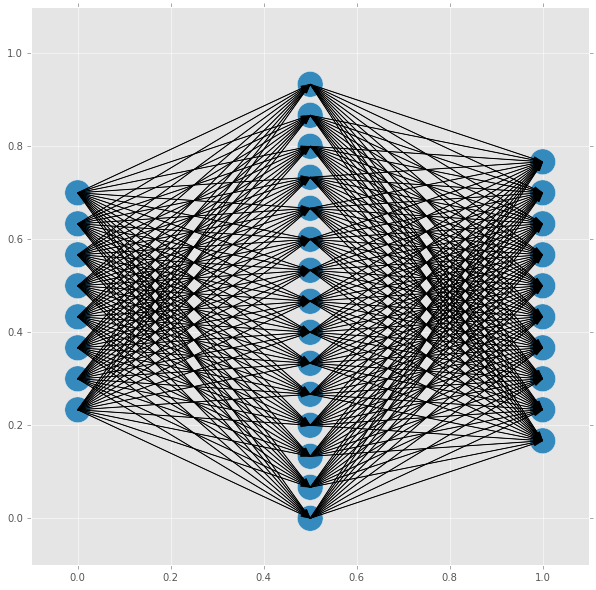

In [12]:
plt.figure(figsize=(10, 10))
draw(net)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
#plt.axis('off')

In [13]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

In [14]:
def feedforward(self, a, debug=False):
        """Return the output of the network if "a" is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
            if debug:
                print(a)
        return a

In [15]:
Network.feedforward = feedforward

In [16]:
net = Network((7, 3, 9))

In [17]:
a = np.array([1, 1, 1, 1, 1, 1, 1])[:, np.newaxis]

In [18]:
np.dot(net.weights[0], a)

array([[-0.52131594],
       [-3.13535981],
       [ 3.22181529]])

In [19]:
net.feedforward(a, debug=True)

[[ 0.1504785 ]
 [ 0.10383884]
 [ 0.93440981]]
[[ 0.4788019 ]
 [ 0.12738191]
 [ 0.72162722]
 [ 0.15451387]
 [ 0.88532316]
 [ 0.82938427]
 [ 0.68606358]
 [ 0.05941079]
 [ 0.33639283]]


array([[ 0.4788019 ],
       [ 0.12738191],
       [ 0.72162722],
       [ 0.15451387],
       [ 0.88532316],
       [ 0.82938427],
       [ 0.68606358],
       [ 0.05941079],
       [ 0.33639283]])

# SGD 

In [20]:
import random
def SGD(self, training_data, epochs, mini_batch_size, eta,
        test_data=None):
    """Train the neural network using mini-batch stochastic
    gradient descent.  The "training_data" is a list of tuples
    "(x, y)" representing the training inputs and the desired
    outputs.  The other non-optional parameters are
    self-explanatory.  If "test_data" is provided then the
    network will be evaluated against the test data after each
    epoch, and partial progress printed out.  This is useful for
    tracking progress, but slows things down substantially."""
    if test_data: n_test = len(test_data)
    n = len(training_data)
    for j in range(epochs):
        random.shuffle(training_data)
        mini_batches = [
            training_data[k:k+mini_batch_size]
            for k in range(0, n, mini_batch_size)]
        for mini_batch in mini_batches:
            self.update_mini_batch(mini_batch, eta)
        if test_data:
            print("Epoch {0}: {1} / {2}".format(
                j, self.evaluate(test_data), n_test))
        else:
            print("Epoch {0} complete".format(j))

In [21]:
Network.SGD = SGD

# Digits

In [22]:
# %load ../src/mnist_loader
"""
mnist_loader
~~~~~~~~~~~~

A library to load the MNIST image data.  For details of the data
structures that are returned, see the doc strings for ``load_data``
and ``load_data_wrapper``.  In practice, ``load_data_wrapper`` is the
function usually called by our neural network code.
"""

#### Libraries
# Standard library
import pickle
import gzip

# Third-party libraries
import numpy as np

def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.

    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.

    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.

    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.

    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    f = gzip.open('../data/mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.

    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.

    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.

    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e


In [38]:
training_data, validation_data, test_data = load_data_wrapper()

In [39]:
len(list(training_data))

50000

In [40]:
len(list(validation_data))

10000

In [41]:
len(list(test_data))

10000

In [44]:
training_data, validation_data, test_data = load_data_wrapper()

In [45]:
tr_data = list(training_data)

In [46]:
len(tr_data)

50000

(-0.5, 27.5, 27.5, -0.5)

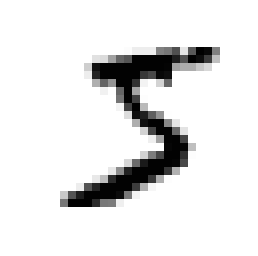

In [47]:
plt.imshow(1 - tr_data[0][0].reshape(28, 28), cmap='gray', interpolation='nearest')
plt.axis('off')

In [30]:
from ipywidgets import Button
from IPython.display import clear_output
from random import shuffle

In [48]:
def show_random(event):
    "Shows random digits."
    shuffle(tr_data)
    clear_output()
    plt.figure(figsize=(10, 10))
    n = 5
    for ind, im in enumerate(tr_data[:n**2]):
        plt.subplot(n, n, ind + 1)
        plt.imshow(1 - im[0].reshape(28, 28), cmap='gray', interpolation='nearest')
        plt.axis('off')

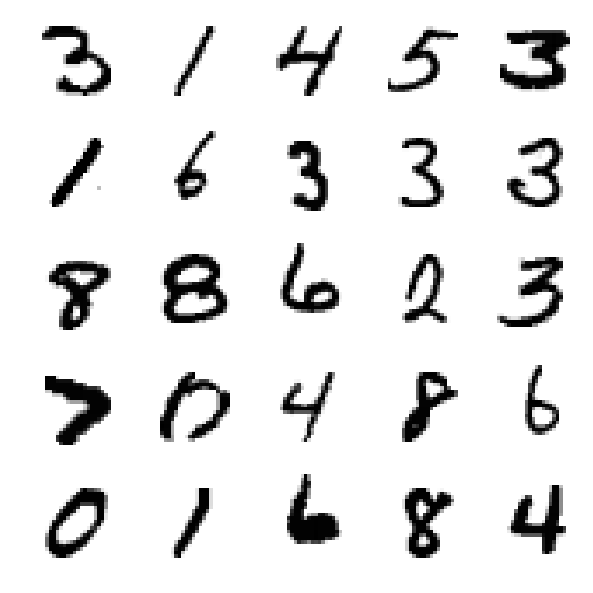

In [49]:
b = Button(description='Show random digits')
b.on_click(show_random)
b

# Training the net 

In [50]:
def update_mini_batch(self, mini_batch, eta):
    """Update the network's weights and biases by applying
    gradient descent using backpropagation to a single mini batch.
    The "mini_batch" is a list of tuples "(x, y)", and "eta"
    is the learning rate."""
    nabla_b = [np.zeros(b.shape) for b in self.biases]
    nabla_w = [np.zeros(w.shape) for w in self.weights]
    for x, y in mini_batch:
        delta_nabla_b, delta_nabla_w = self.backprop(x, y)
        nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
        nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
    self.weights = [w-(eta/len(mini_batch))*nw 
                    for w, nw in zip(self.weights, nabla_w)]
    self.biases = [b-(eta/len(mini_batch))*nb 
                   for b, nb in zip(self.biases, nabla_b)]

In [51]:
Network.update_mini_batch = update_mini_batch

In [63]:
def backprop(self, x, y):
    """Return a tuple ``(nabla_b, nabla_w)`` representing the
    gradient for the cost function C_x.  ``nabla_b`` and
    ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
    to ``self.biases`` and ``self.weights``."""
    nabla_b = [np.zeros(b.shape) for b in self.biases]
    nabla_w = [np.zeros(w.shape) for w in self.weights]
    # feedforward
    activation = x
    activations = [x] # list to store all the activations, layer by layer
    zs = [] # list to store all the z vectors, layer by layer
    for b, w in zip(self.biases, self.weights):
        z = np.dot(w, activation)+b
        zs.append(z)
        activation = sigmoid(z)
        activations.append(activation)
    # backward pass
    delta = self.cost_derivative(activations[-1], y) * \
        sigmoid_prime(zs[-1])
    nabla_b[-1] = delta
    nabla_w[-1] = np.dot(delta, activations[-2].transpose())
    # Note that the variable l in the loop below is used a little
    # differently to the notation in Chapter 2 of the book.  Here,
    # l = 1 means the last layer of neurons, l = 2 is the
    # second-last layer, and so on.  It's a renumbering of the
    # scheme in the book, used here to take advantage of the fact
    # that Python can use negative indices in lists.
    for l in range(2, self.num_layers):
        z = zs[-l]
        sp = sigmoid_prime(z)
        delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
        nabla_b[-l] = delta
        nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
    return (nabla_b, nabla_w)

def evaluate(self, test_data):
    """Return the number of test inputs for which the neural
    network outputs the correct result. Note that the neural
    network's output is assumed to be the index of whichever
    neuron in the final layer has the highest activation."""
    test_results = [(np.argmax(self.feedforward(x)), y)
                    for (x, y) in test_data]
    return sum(int(x == y) for (x, y) in test_results)

def cost_derivative(self, output_activations, y):
    """Return the vector of partial derivatives \partial C_x /
    \partial a for the output activations."""
    return (output_activations-y)

In [64]:
Network.backprop = backprop
Network.evaluate = evaluate
Network.cost_derivative = cost_derivative

In [65]:
def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

Now, let's load the digits.

In [66]:
training_data, validation_data, test_data = load_data_wrapper()

In [67]:
test_data = list(test_data)
training_data = list(training_data)

Let's build a net

In [68]:
net = Network([784, 30, 10])

In [69]:
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0: 9082 / 10000
Epoch 1: 9242 / 10000
Epoch 2: 9324 / 10000
Epoch 3: 9323 / 10000
Epoch 4: 9359 / 10000
Epoch 5: 9395 / 10000
Epoch 6: 9428 / 10000
Epoch 7: 9397 / 10000
Epoch 8: 9425 / 10000
Epoch 9: 9438 / 10000
Epoch 10: 9471 / 10000
Epoch 11: 9425 / 10000
Epoch 12: 9480 / 10000
Epoch 13: 9481 / 10000
Epoch 14: 9467 / 10000
Epoch 15: 9502 / 10000
Epoch 16: 9489 / 10000
Epoch 17: 9532 / 10000
Epoch 18: 9515 / 10000
Epoch 19: 9523 / 10000
Epoch 20: 9503 / 10000
Epoch 21: 9516 / 10000
Epoch 22: 9518 / 10000
Epoch 23: 9528 / 10000
Epoch 24: 9527 / 10000
Epoch 25: 9509 / 10000
Epoch 26: 9518 / 10000
Epoch 27: 9509 / 10000
Epoch 28: 9512 / 10000
Epoch 29: 9510 / 10000


Best result: **95.32%**!

Let's rerun the experiment with a net with 100 neurons instead of 30.

In [70]:
net = Network([784, 100, 10])

In [71]:
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0: 5449 / 10000
Epoch 1: 5584 / 10000
Epoch 2: 5652 / 10000
Epoch 3: 5667 / 10000
Epoch 4: 6775 / 10000
Epoch 5: 6787 / 10000
Epoch 6: 6824 / 10000
Epoch 7: 6827 / 10000
Epoch 8: 6821 / 10000
Epoch 9: 6915 / 10000
Epoch 10: 7748 / 10000
Epoch 11: 7772 / 10000
Epoch 12: 7784 / 10000
Epoch 13: 7787 / 10000
Epoch 14: 7787 / 10000
Epoch 15: 7858 / 10000
Epoch 16: 8688 / 10000
Epoch 17: 8713 / 10000
Epoch 18: 8719 / 10000
Epoch 19: 8740 / 10000
Epoch 20: 8725 / 10000
Epoch 21: 8719 / 10000
Epoch 22: 8723 / 10000
Epoch 23: 8736 / 10000
Epoch 24: 8739 / 10000
Epoch 25: 8743 / 10000
Epoch 26: 8737 / 10000
Epoch 27: 8735 / 10000
Epoch 28: 8741 / 10000
Epoch 29: 8750 / 10000


Result with a bigger net: disappointing! **87.5%** accuracy.

# Exercice

Let's train a net without any hidden layer.


In [72]:
net = Network([784, 10])

In [73]:
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0: 7417 / 10000
Epoch 1: 7486 / 10000
Epoch 2: 7496 / 10000
Epoch 3: 7545 / 10000
Epoch 4: 7557 / 10000
Epoch 5: 7576 / 10000
Epoch 6: 7559 / 10000
Epoch 7: 7568 / 10000
Epoch 8: 7579 / 10000
Epoch 9: 7563 / 10000
Epoch 10: 7570 / 10000
Epoch 11: 7561 / 10000
Epoch 12: 7569 / 10000
Epoch 13: 7573 / 10000
Epoch 14: 7554 / 10000
Epoch 15: 7577 / 10000
Epoch 16: 7585 / 10000
Epoch 17: 7577 / 10000
Epoch 18: 7571 / 10000
Epoch 19: 7571 / 10000
Epoch 20: 7552 / 10000
Epoch 21: 7577 / 10000
Epoch 22: 7575 / 10000
Epoch 23: 7577 / 10000
Epoch 24: 7566 / 10000
Epoch 25: 7578 / 10000
Epoch 26: 7585 / 10000
Epoch 27: 7578 / 10000
Epoch 28: 7584 / 10000
Epoch 29: 7555 / 10000


Result with a shallower net: **75.8%** accuracy.

# Brightness strategy

Let's try the brightness strategy. First, we compute average brightnesses.

In [82]:
from collections import defaultdict

brightnesses = defaultdict(list)

for sample in training_data:
    img_data, category = sample
    brightnesses[category.argmax()].append(img_data.mean())

In [84]:
for category in brightnesses:
    print("category: {}, mean brightness: {}".format(category, np.mean(brightnesses[category])))

category: 0, mean brightness: 0.17330244183540344
category: 1, mean brightness: 0.07609738409519196
category: 2, mean brightness: 0.1483345776796341
category: 3, mean brightness: 0.141416996717453
category: 4, mean brightness: 0.12145503610372543
category: 5, mean brightness: 0.12799294292926788
category: 6, mean brightness: 0.13696826994419098
category: 7, mean brightness: 0.11464137583971024
category: 8, mean brightness: 0.15035785734653473
category: 9, mean brightness: 0.12250708788633347


In [85]:
mean_brightness = dict(zip(brightnesses.keys(),
                           [np.mean(brightnesses[category]) for category in brightnesses]))

In [89]:
np.array(list(mean_brightness.values()))

array([ 0.17330244,  0.07609738,  0.14833458,  0.141417  ,  0.12145504,
        0.12799294,  0.13696827,  0.11464138,  0.15035786,  0.12250709], dtype=float32)

In [107]:
def classify(img_data, debug=False):
    "Classifies digit according to mean brightness."
    if debug:
        print("{}".format(img_data.mean()))
    return np.argmin(np.abs(img_data.mean() - np.array(list(mean_brightness.values()))))

In [108]:
len(test_data)

10000

In [109]:
def evaluate_brightness(test_data):
    """Return the number of test inputs for which the brightness method."""
    test_results = [(classify(x), y)
                    for (x, y) in test_data]
    return sum(int(x == y) for (x, y) in test_results)

In [110]:
evaluate_brightness(test_data)

2225

# Using scikit-learn 

Let's build a classifier.

In [118]:
x.shape

(784, 1)

In [114]:
from sklearn.svm import SVC

In [115]:
clf = SVC()

Let's format the data.

In [123]:
X = np.hstack([item[0] for item in training_data]).T

In [124]:
X.shape

(50000, 784)

In [126]:
y = np.array([np.argmax(item[1]) for item in training_data])

In [127]:
y.shape

(50000,)

In [128]:
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Let's evaluate the results:

In [130]:
x, y = test_data[0]

In [137]:
clf.predict(x.T)

array([7], dtype=int64)

In [136]:
int(clf.predict(x.T)) == y

True

In [141]:
sum(int(clf.predict(x.T)) == y for x,y in test_data)

9435

What score is that? **94.35%**! Like Micheal Nielsen said!

Off to chapter 2!